<a href="https://colab.research.google.com/github/SamanehHajizadeh/AkademiWork/blob/main/17Oct_assignment2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Classification of Handwritten Digits

In this assignment, we will use the $k$-nearest neighbour classifier and a dense neural network (multilayer perceptron) to classify handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/).



## Working together

The assignment should be solved in **groups of two**. Copying code from other students, the Internet, or other sources is not allowed (the provided helper code excluded). If you want to work alone, you must have a compelling reason (that convinces us) for doing so.

## Task

You are given a dataset of images of handwritten digits (0 through 9) and the correct answers to train your machine learning models on.

You need to divide the images into a training data set, (optionally) a validation data set, and a test set. You may also use cross-validation instead of a validation data set.

After training, and after selecting the proper hyper-parameters (the number of neighbors, $k$, the number of layers, the number of neurons, *etc.*), classify the images in the test set to see how accurately your models classify unknown images. **Note**: You should *never* use, look at, or classify the test set until you have selected your final model. You are *not* allowed to continue training or do any model alterations after you have evaluated your models on the test data set.

**In order to pass the assignment your solution must correctly classify at least 94 % of the *validation data set images* with the $k$-NN model and at least 97.7 % of the *validation data set images* with the neural network model.**

## What to hand in

You should hand in a complete and well-written report (in `pdf` format) together with your Jupyter notebook electronically in Labres. Only one member per group hands in and marks the other member. **Note**: you cannot change group members after the first hand-in, so make sure you do it correct the first time.

The report may be brief (try to keep it under 5 pages) but it is important that you fulfill the following requirements:

 * The report must have a title page including names and user names (@cs) for all group members, course name, and assignment name.
 * The report should be as short as possible and as long as necessary. If your report exceeds five pages (incl. the title page), chances are that you are doing something wrong.
 * Describe how your solution works on a level that does not lose interesting details. Divide the report into two parts (one for $k$-NN, the other for the neural network), and split each part into *implementation*, *results*, and *discussion* subsections.
   - Most important is that you describe how your solution works, and why you solved it in a particular way. Clearly state the ranges for your hyper-parameters, and explain why you chose those.
   - Explain, and give pseudo-code for your hyper-parameter search. Explain any decisions/choices you've made.
   - For the neural network: Plot how the loss evolve during training of your best model, and interpret the plot. The loss is available in the `MLPClassifier` after training.
   - Describe how your work went and which problems and issues you faced when developing the program.
   - Describe how you divided the work between you.
   - Use clear, well written English language.
   - You must not include your source code in the report, supply it in the Jupyter notebook.
   - **Report your validation scores in the report.**

The source code should align to the following:

 * Comment the code in a reasonable way. Follow the [Docstring conventions](https://peps.python.org/pep-0257/).
 * Structure your code in a suitable way, such that it is easy to follow what is going on.
 * Name classes, variables, methods, modules, *etc.*, such that the names clearly describe their function and follow the specifications given above.
 * The code you hand in should not contain sections that are not used, or unnecessary. Make sure that you understand every part of the code that you hand in.
 * **Important:** hand in a notebook that contains your execution results, i.e., execute the notebook from scratch (**Kernel** - **Re-start and run all**) and save before you hand in.

## Getting started

You can follow [these instructions](https://jupyter.org/install) to install Jupyter Notebook. Then, proceed as follows:

 - Download this notebook.
 - Start Jupyter Notebook
 - Open your saved copy of this notebook

Alternatively, you can also use [Google Colab](https://colab.research.google.com/) to work on the assignment "in the cloud".

**Note**: If you take the course Artificial Intelligence in Cognitive Science (5DV201), then set the following variable to `False`:



In [1]:
course_5DV124 = True

In [2]:
%%capture
# Install the dependencies (in case you use Google Colab, these should be available by default, though)
! pip install --user -Iv numpy matplotlib sklearn==0.24.1

***NUMPY RANDOM SEED IS FOR PSEUDO-RANDOM NUMBERS IN PYTHON.
NumPy random seed is simply a function that sets the random seed of the NumPy pseudo-random number generator. It provides an essential input that enables NumPy to generate pseudo-random numbers for random processes.***
***np.random.seed(0) makes the random numbers predictable***
***When you set the seed (every time), it does the same thing every time, giving you the same numbers.***

In [3]:
import numpy as np
np.random.seed(42)  # Set the random seed for reproducible results

***MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning***

***Train-Valid-Test split is a technique to evaluate the performance of your machine learning model — classification or regression alike. You take a given dataset and divide it into three subsets. Train Dataset
Set: used for learning (by the model)to fit the parameters to the machine learning model. Valid Dataset:Set of data to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters.Test Dataset:to provide an unbiased evaluation of a final model fitted on the training dataset.***

In [4]:
# Load the MNIST dataset (this may take a while)
import pandas as pd
import sklearn.datasets

data = sklearn.datasets.fetch_openml("mnist_784")
'''df = pd.DataFrame(data.data)
df['target'] = data.target
df
df.head()'''
print(data.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
#pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 573 kB/s 


Split data to three parts. Data/test/validation. There are two way to split data **"train_valid_test_split"** splits data advanced to three parts or **"train_test_split"** which split to data/test and test/val. Here we have implemented both ways to compare. 

In [21]:
import numpy as np
np.random.seed(42)  # Set the random seed for reproducible results

'''from fast_ml.model_development import train_valid_test_split
Xtrain, ytrain, Xval, yval, Xtest, ytest = train_valid_test_split(df,target='target', train_size=0.8, valid_size=0.1, test_size=0.1)'''

# Split the data into training, (validation), and test set

from sklearn.model_selection import train_test_split


Xtrain, Xtest, ytrain, ytest = train_test_split(data.data, data.target, test_size=0.05, random_state=1)

# You may alternatively skip this / have a combined Xtrain and Xval here and instead use cross-validation below
Xtest, Xval, ytest, yval = train_test_split(Xtest, ytest, test_size=0.5, random_state=1)
Xtrain =  np.asarray(Xtrain)
Xtest =  np.asarray(Xtest)
Xval =  np.asarray(Xval)
ytrain =  np.asarray(ytrain)
ytest =  np.asarray(ytest)
yval =  np.asarray(yval)


# Note! Do not touch the test data until the very end!
print(f"Training set size X   : {Xtrain.shape}")
print(f"Training set size y   : {ytrain.shape}")
print(f"Validation set size X : {Xval.shape}")
print(f"Validation set size y : {yval.shape}")
print(f"Test set size X       : {Xtest.shape}")
print(f"Test set size y       : {ytest.shape}")
print(f"Output classes        : {set(ytrain)}")


Training set size X   : (66500, 784)
Training set size y   : (66500,)
Validation set size X : (1750, 784)
Validation set size y : (1750,)
Test set size X       : (1750, 784)
Test set size y       : (1750,)
Output classes        : {'7', '0', '8', '9', '5', '3', '2', '6', '4', '1'}


i: 0 j: 0 ax[i][j] AxesSubplot(0.005,0.556097;0.222472x0.438903)
i: 0 j: 1 ax[i][j] AxesSubplot(0.260843,0.556097;0.222472x0.438903)
i: 0 j: 2 ax[i][j] AxesSubplot(0.516685,0.556097;0.222472x0.438903)
i: 0 j: 3 ax[i][j] AxesSubplot(0.772528,0.556097;0.222472x0.438903)
i: 1 j: 0 ax[i][j] AxesSubplot(0.005,0.115;0.222472x0.438903)
i: 1 j: 1 ax[i][j] AxesSubplot(0.260843,0.115;0.222472x0.438903)
i: 1 j: 2 ax[i][j] AxesSubplot(0.516685,0.115;0.222472x0.438903)
i: 1 j: 3 ax[i][j] AxesSubplot(0.772528,0.115;0.222472x0.438903)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f149a1c8d90>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f1499f69c50>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f149a18e3d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f149a697590>], [<matplotlib.axes._subplots.AxesSubplot object at 0x7f149a1c8d90>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f1499f69c50>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f149a18e3d0>, <matplot

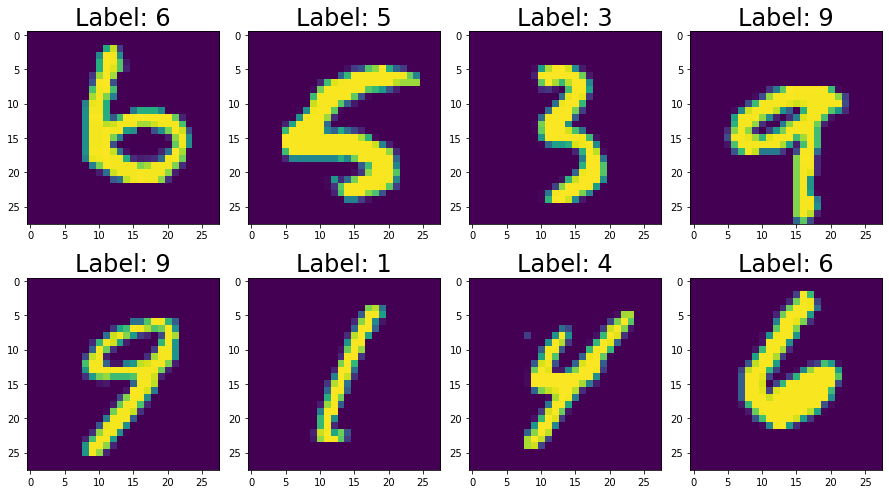

In [22]:
# Plot a few images

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 7.75))
fig.subplots_adjust(top=0.995,
                    bottom=0.115,
                    left=0.005,
                    right=0.995,
                    wspace=0.15,
                    hspace=0.005)

plot_array = (2, 4)
ax = [[None] * plot_array[1]] * plot_array[0]
it = 0
for i in range(plot_array[0]):
    for j in range(plot_array[1]):
        ax[i][j] = plt.subplot2grid((2, 4), (i, j), rowspan=1, colspan=1)
        ax[i][j].imshow(Xtrain[it, :].reshape((28, 28)))
        ##***To see without plot view what is exactly ax[i][j]***      
        print("i:",i , "j:",j,"ax[i][j]",ax[i][j])
        ax[i][j].set_title(f"Label: {ytrain[it]}", fontsize=24)
        it += 1
print(ax)



The **sklearn preprocessing** package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators. In general, learning algorithms benefit from standardization of the data set.

In [23]:
# Preprocess the data
import sklearn.preprocessing

print(f"Before preprocessing, test data       : "
      f"min = {np.min(Xtrain):.1f}, "
      f"max = {np.max(Xtrain):.1f}, "
      f"mean = {np.mean(Xtrain):.1f}, "
      f"std = {np.std(Xtrain):.1f}")
print(f"Before preprocessing, validation data : "
      f"min = {np.min(Xval):.1f}, "
      f"max = {np.max(Xval):.1f}, "
      f"mean = {np.mean(Xval):.1f}, "
      f"std = {np.std(Xval):.1f}")
print(f"Before preprocessing, test data       : "
      f"min = {np.min(Xtest):.1f}, "
      f"max = {np.max(Xtest):.1f}, "
      f"mean = {np.mean(Xtest):.1f}, "
      f"std = {np.std(Xtest):.1f}")

scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler.fit(Xtrain)  # Every statistic we compute is found on the training data!

Xtrain = scaler.transform(Xtrain)
Xval = scaler.transform(Xval)
# TODO: If you do cross-validation, you must redo this on the training data in
#       each cross-validation loop, and then transform the validation data as
#       well!
Xtest = scaler.transform(Xtest)

print(f"After preprocessing, test data        : "
      f"min = {np.min(Xtrain):.1f}, "
      f"max = {np.max(Xtrain):.1f}, "
      f"mean = {np.mean(Xtrain):.1f}, "
      f"std = {np.std(Xtrain):.1f}")
print(f"After preprocessing, validation data  : "
      f"min = {np.min(Xval):.1f}, "
      f"max = {np.max(Xval):.1f}, "
      f"mean = {np.mean(Xval):.1f}, "
      f"std = {np.std(Xval):.1f}")
print(f"After preprocessing, test data        : "
      f"min = {np.min(Xtest):.1f}, "
      f"max = {np.max(Xtest):.1f}, "
      f"mean = {np.mean(Xtest):.1f}, "
      f"std = {np.std(Xtest):.1f}")

# TODO: Try to apply other preprocessing, e.g. the
#       sklearn.preprocessing.StandardScaler(), and see if the results improve.

Before preprocessing, test data       : min = 0.0, max = 255.0, mean = 33.4, std = 78.7
Before preprocessing, validation data : min = 0.0, max = 255.0, mean = 33.0, std = 78.3
Before preprocessing, test data       : min = 0.0, max = 255.0, mean = 32.9, std = 78.2
After preprocessing, test data        : min = -1.0, max = 1.0, mean = -0.7, std = 0.6
After preprocessing, validation data  : min = -1.0, max = 1.6, mean = -0.7, std = 0.6
After preprocessing, test data        : min = -1.0, max = 4.6, mean = -0.7, std = 0.6



Use **StandardScaler**  to have zero-mean, unit standard-deviation.

### The $k$-NN model

If you take the course **5DV124**, then you will have to implement the $k$-NN classifier yourself. The below implementation uses the scikit-learn implementation of the $k$-NN classifier, but you need to do it yourself.

If you take the course **5DV201**, then you can use the $k$-NN classifier from scikit-learn directly. You are of course free to also implement the $k$-NN classifier yourself, if you want to do that.

In both cases, you need to perform a hyper-parameter search for the optimal number of neighbours, $k$.

In [ ]:
#1
#KNeighborsClassifier easy solution 
'''from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
KNN=KNeighborsClassifier(n_neighbors=4)

KNN.fit(Xtrain, ytrain)
Ypred=KNN.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest, Ypred))

err = KNN.score(Xval[:100, :], yval[:100])
print(f"Number of neighbours: k={k}, validation accuracy: {err}")'''

'from sklearn.neighbors import KNeighborsClassifier\n\nmodel = KNeighborsClassifier(n_neighbors=4)\nKNN=KNeighborsClassifier(n_neighbors=4)\n\nKNN.fit(Xtrain, ytrain)\nYpred=KNN.predict(Xtest)\n\nfrom sklearn.metrics import classification_report, confusion_matrix\nprint(classification_report(ytest, Ypred))\n\nerr = KNN.score(Xval[:100, :], yval[:100])\nprint(f"Number of neighbours: k={k}, validation accuracy: {err}")'

we use 
**training data** for finding nearest neighbours,
**cross-validation data** to find the best value of “K” (K neighbours here)  **test** to test our model on totally unseen test data. This test data is equivalent to the future unseen data points.

In [24]:
def most_common(lst):
 return max(set(lst), key=lst.count) 

In [25]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [26]:
# Create the k-NN classifier
import numpy as np
from collections import Counter
import sklearn.neighbors
from scipy import stats

if course_5DV124:
    # TODO: Create your own nearest neighbour classifier:
    class KNeighborsClassifier(sklearn.neighbors.KNeighborsClassifier):

        def most_common(lst):
         return max(set(lst), key=lst.count) 

        def __init__(self, k=5,  dist_metric=euclidean):  
            self.k=k
            self.Xtrain=None
            self.ytrain=None
            self.dist_metric = dist_metric
            #self.metric = 'euclidean'

        @staticmethod
        def _eucidean_distance(p,q):
          return np.sqrt(np.sum(p-q)**2)

        '''def fit(self, X, y):
            self.Xtrain=X
            self.ytrain=y'''
        def fit(self, Xtrain, ytrain):
         self.Xtrain = Xtrain
         self.ytrain = ytrain 

        def predict(self, X_test):
         neighbors = []
         for x in X_test:
            distances = self.dist_metric(x, self.Xtrain)
            y_sorted = [y for _, y in sorted(zip(distances, self.ytrain))]
            neighbors.append(y_sorted[:self.k])
         return list(map(most_common, neighbors))
        def evaluate(self, X_test, y_test):
         y_pred = self.predict(X_test)
         accuracy = sum(y_pred == y_test) / len(y_test)
         return accuracy


In [27]:
# Perform grid search to find the number of neighbours, K

'''k_max = 10  # Set the maximum number of neighbours considered
errs_val = []
k = 3
model = KNeighborsClassifier(k=k)

model.fit(Xtrain[:500, :], ytrain[:500])

error = model.score(Xval[:100, :], yval[:100])
accuracy = model.evaluate(Xtest, ytest)
errs_val.append('')

print(f"Number of neighbours: k={k}, validation accuracy: {error}")
print('accuracy= ', accuracy)

print("****error****", error)
errs_val.append(error)

print(" Grid search done!")'''

Number of neighbours: k=3, validation accuracy: 0.82
accuracy=  0.8285714285714286
****error**** 0.82
 Grid search done!


**Test knn model in different range to find the best neigbour(K).**

Number of neighbours: k=1, validation accuracy: 0.956
Number of neighbours: k=2, validation accuracy: 0.948
Number of neighbours: k=3, validation accuracy: 0.95
Number of neighbours: k=4, validation accuracy: 0.956
Number of neighbours: k=5, validation accuracy: 0.958
Number of neighbours: k=6, validation accuracy: 0.954
Number of neighbours: k=7, validation accuracy: 0.954
Number of neighbours: k=8, validation accuracy: 0.954
Number of neighbours: k=9, validation accuracy: 0.95


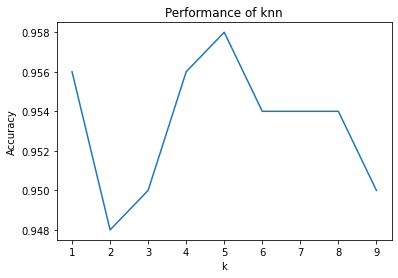

In [28]:
#WITH StandardScaler()

accuracies = []
errs_val=[]
k_range = range(1, 10)

for k in k_range:
    knn = KNeighborsClassifier(k=k)
    knn.fit(Xtrain[:10000, :], ytrain[:10000])
    accuracy = knn.score(Xval[:500, :], yval[:500])
    error = knn.score(Xval[:500, :], yval[:500])
    print(f"Number of neighbours: k={k}, validation accuracy: {error}")
    accuracies.append(accuracy)
    errs_val.append(error)

# plot to see clearly
fig, ax = plt.subplots()
ax.plot(k_range, errs_val)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()


In [ ]:

#WITH preprocessing.MinMaxScaler
'''scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler.fit(Xtrain)  # Every statistic we compute is found on the training data!

Xtrain = scaler.transform(Xtrain)
Xval = scaler.transform(Xval)
# TODO: If you do cross-validation, you must redo this on the training data in
#       each cross-validation loop, and then transform the validation data as
#       well!
Xtest = scaler.transform(Xtest)'''

Number of neighbours: k=1, validation accuracy: 0.9
Number of neighbours: k=2, validation accuracy: 0.85
Number of neighbours: k=3, validation accuracy: 0.82
Number of neighbours: k=4, validation accuracy: 0.84
Number of neighbours: k=5, validation accuracy: 0.83
Number of neighbours: k=6, validation accuracy: 0.82
Number of neighbours: k=7, validation accuracy: 0.81
Number of neighbours: k=8, validation accuracy: 0.79
Number of neighbours: k=9, validation accuracy: 0.83
Number of neighbours: k=10, validation accuracy: 0.78
Number of neighbours: k=11, validation accuracy: 0.8
Number of neighbours: k=12, validation accuracy: 0.78
Number of neighbours: k=13, validation accuracy: 0.79
Number of neighbours: k=14, validation accuracy: 0.78
Number of neighbours: k=15, validation accuracy: 0.77
Number of neighbours: k=16, validation accuracy: 0.77
Number of neighbours: k=17, validation accuracy: 0.78
Number of neighbours: k=18, validation accuracy: 0.79
Number of neighbours: k=19, validation 

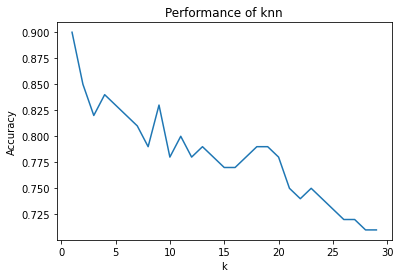

In [ ]:
# Test knn model across varying ks
'''accuracies = []
errs_val=[]
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(Xtrain[:10000, :], ytrain[:10000])
    accuracy = knn.score(Xval[:10000, :], yval[:10000])
    error = knn.score(Xval[:100, :], yval[:100])
    print(f"Number of neighbours: k={k}, validation accuracy: {error}")
    accuracies.append(accuracy)
    errs_val.append(error)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, errs_val)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()'''

In [29]:
# Train the final k-NN model with the best value for k

k_best = np.argmax(errs_val) + 1  # Note that k=1 is at index 0.
print(f"The best value was {errs_val[k_best - 1]}, found using k={k_best}.")

model_knn = KNeighborsClassifier(k=k_best)
model_knn.fit(Xtrain[:10000, :], ytrain[:10000])
err = model_knn.score(Xval[:1000, :], yval[:1000])
print(f"Final validation accuracy: {err}")

The best value was 0.958, found using k=5.
Final validation accuracy: 0.954


In [19]:
# TODO: Try to apply other preprocessing, e.g. the
#       sklearn.preprocessing.StandardScaler(), and see if the results improve.
# Preprocess the data with StandardScaler
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)

# TODO: If you do cross-validation, you must redo this on the training data in
#       each cross-validation loop, and then transform the validation data as
#       well!
#scaler.fit(Xval)
Xval = scaler.transform(Xval)

# TODO: If you do cross-validation, you must redo this on the training data in
#       each cross-validation loop, and then transform the validation data as
#       well!
#scaler.fit(Xtest)
Xtest = scaler.transform(Xtest)

print(f"After preprocessing, test data        : "
      f"min = {np.min(Xtrain):.1f}, "
      f"max = {np.max(Xtrain):.1f}, "
      f"mean = {np.mean(Xtrain):.1f}, "
      f"std = {np.std(Xtrain):.1f}")
print(f"After preprocessing, validation data  : "
      f"min = {np.min(Xval):.1f}, "
      f"max = {np.max(Xval):.1f}, "
      f"mean = {np.mean(Xval):.1f}, "
      f"std = {np.std(Xval):.1f}")
print(f"After preprocessing, test data        : "
      f"min = {np.min(Xtest):.1f}, "
      f"max = {np.max(Xtest):.1f}, "
      f"mean = {np.mean(Xtest):.1f}, "
      f"std = {np.std(Xtest):.1f}")'''

After preprocessing, test data        : min = -1.3, max = 257.9, mean = -0.0, std = 1.0
After preprocessing, validation data  : min = -1.3, max = 160.2, mean = -0.0, std = 0.9
After preprocessing, test data        : min = -1.3, max = 465.8, mean = -0.0, std = 1.1


In [ ]:
# Test knn model across varying ks
'''accuracies = []
errs_val=[]
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(Xtrain[:10000, :], ytrain[:10000])
    accuracy = knn.score(Xval[:10000, :], yval[:10000])
    error = knn.score(Xval[:100, :], yval[:100])
    print(f"Number of neighbours: k={k}, validation accuracy: {error}")
    accuracies.append(accuracy)
    errs_val.append(error)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, errs_val)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()'''

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())


### The neural network model

We will use the neural networks (multilayer perceptrons) implemented in scikit-learn. You need to find the optimal number of layers, the number of neurons in each of the layers, and any other hyper-parameters that may be relevant.


Neural networks are computing systems with interconnected nodes that work much like neurons in the human brain.
As Neural network works,we added hidden-layers which is suposed to perform the model as nodes.
First two hiddean layesr got added but to aim more than 97.7 or 98% we added the third hidden layer as well.
Each layers have a range of layers. the numbers & the maximum number of layer(Neurons) is added.

By going through different layers (nodes) we return the best value and we determine in which layer it was found. 
The best value is found in the layer sizes: (200, 200, 300), the validation accuracy is reported 0.98

arnings.warn("Training interrupted by user.")
Hidden layer sizes: (200, 200, 100), validation accuracy: 0.97

The best value was 0.97, found using layer sizes: (200, 200, 300).


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Final validation accuracy: 0.98


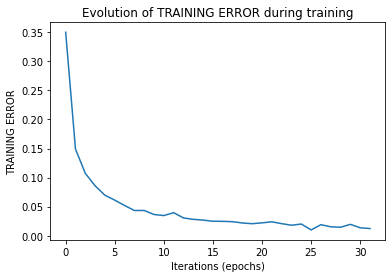

In [33]:
# Train the final model using the best layer sizes

hidden_layer_sizes_best = max(errs_val, key=errs_val.get, default='')
print(f"The best value was {errs_val[hidden_layer_sizes_best]}, "
      f"found using layer sizes: {hidden_layer_sizes_best}.")

model_ann = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_best,
    alpha=0.0001,
    batch_size='auto',
    learning_rate_init=0.001,
    max_iter=200,
)

model_ann.fit(Xtrain[:50000, :], ytrain[:50000])
err = model_ann.score(Xval[:10000, :], yval[:10000])

print(f"Final validation accuracy: {err}")

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(model_ann.loss_curve_)
plt.show()

Once we have selected our final model, we can compute the test error on the final models as the last thing we do. Make sure to only do this at the very end, after you have selected the best models you can find.

In [32]:
# Evaluate the final model on all the data sets, including the test data. We
# only evaluate the test data once, and as the last thing we do. If you train
# another model after this, based on the performance on the test data, then your
# test data is effectively a validation dataset, and you no longer have a test
# dataset. (Or, if you keep your test data set, then your results are biased and
# by that unreliable.)
print(f"k-NN model training data accuracy  : {model_knn.score(Xtrain, ytrain)}")
print(f"k-NN model validation data accuracy: {model_knn.score(Xval, yval)}")
if False:  # Change this to True as the very last thing you do!
    print(f"k-NN model test data accuracy      : "
          f"{model_knn.score(Xtest, ytest)}")

print(f"ANN model training data accuracy   : {model_ann.score(Xtrain, ytrain)}")
print(f"ANN model validation data accuracy : {model_ann.score(Xval, yval)}")
if False:  # Change this to True as the very last thing you do!
    print(f"ANN model test data accuracy       : "
          f"{model_ann.score(Xtest, ytest)}")

KeyboardInterrupt: ignored